# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Data set can be found here: https://archive.ics.uci.edu/dataset/186/wine+quality


# Library

Libraries being used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from time import time

%matplotlib inline

# Visualization

Functions used for visualizing the data

In [ ]:
def distribution(data, feature_label, transformed = False):
  sns.set()
  sns.set_style("whitegrid")
  figure = plt.figure(figsize = (10,5))

  for i, feature in enumerate([feature_label]):
    ax = figure.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#FFA500')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize=16)
    ax.set_xlabel(feature_label)
    ax.set_ylabel("Total Number")
    ax.set_ylim(0,1600)
    ax.set_yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
    ax.set_yticklabels([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])

  if transformed:
    figure.suptitle("Log-Transformed Distributions", fontsize = 16, y = 1)
  else:
    figure.suptitle("Skewed Distribution", fontsize = 16, y = 1)

  figure.show()

In [ ]:
def visualize_classification_performance(results):
  sns.set()
  sns.set_style("whitegrid")
  figure, ax = plt.subplots(2,3, figsize = (11, 9))

  bar_width = 0.1
  colors = ["#e55547", "#4e6e8e", "#2ecc71", "#FFFF00", "#FFC0CB", "#40E0D0"]

  for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
      for i in np.arange(3):
        ax[j//3, j%3].bar(i + k * bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
        ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
        ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
        ax[j//3, j%3].set_xlim((-0.1, 3.0))

  ax[0, 0].set_ylabel("Time (in seconds)")
  ax[0, 1].set_ylabel("Accuracy Score")
  ax[0, 2].set_ylabel("F-score")
  ax[1, 0].set_ylabel("Time (in seconds)")
  ax[1, 1].set_ylabel("Accuracy Score")
  ax[1, 2].set_ylabel("F-score")

  ax[0, 0].set_title("Model Training")
  ax[0, 1].set_title("Accuracy Score on Training Subset")
  ax[0, 2].set_title("F-score on Training Subset")
  ax[1, 0].set_title("Model Predicting")
  ax[1, 1].set_title("Accuracy Score on Testing Set")
  ax[1, 2].set_title("F-score on Testing Set")

  ax[0, 1].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
  ax[1, 1].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
  ax[0, 2].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
  ax[1, 2].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

  ax[0, 1].set_ylim((0, 1))
  ax[0, 2].set_ylim((0, 1))
  ax[1, 1].set_ylim((0, 1))
  ax[1, 2].set_ylim((0, 1))

  patches = []
  for i, learner in enumerate(results.keys()):
      patches.append(mpatches.Patch(color = colors[i], label = learner))
  plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

  plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
  plt.show()

# Data

Testing if we can get the data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Game of Wines/winequality-red.csv", sep=';')
display(data.head(n=10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Checking all the columns to see if there are any missing/empty information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Some more information about the data

Total number of wine data: 1599
Wines with rating more than 6: 217
Percentage of wines with quality more than 6: 13.57%

A Skewed Distribution of the 'quality' feature of the data:


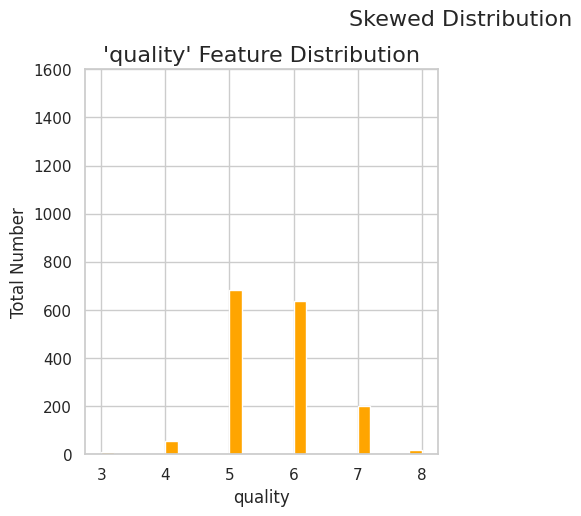

In [ ]:
num_wines = data.shape[0]
qual_above_6 = data.loc[(data["quality"] > 6)]
num_above_6 = qual_above_6.shape[0]

print(f"Total number of wine data: {num_wines}")
print(f"Wines with rating more than 6: {num_above_6}")
print(f"Percentage of wines with quality more than 6: {(num_above_6*100/num_wines):.2f}%")

print(f"\nA Skewed Distribution of the 'quality' feature of the data:")
distribution(data, "quality")

Heatmap to see the co-relations between features

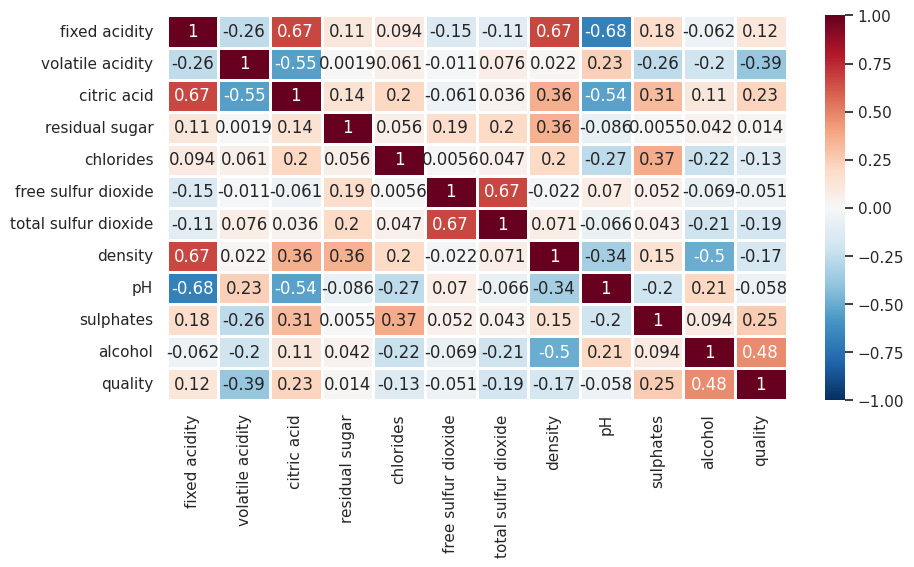

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 1, vmin = -1, cmap="RdBu_r")

Outlier Detection (Tukey's Method) and removal

In [ ]:
out_list = []
for feature in data.keys():
  Q1 = np.percentile(data[feature], q=25)
  Q3 = np.percentile(data[feature], q=75)

  interquartile_range = Q3 - Q1
  step = 1.5 * interquartile_range

  outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
  out_list += outliers.index.tolist()

Removing the outliers from the data

In [ ]:
good_data = data.drop(data.index[out_list]).reset_index(drop = True)
print(f"Total number of data left after taking out the outliers: {good_data.shape[0]}")

Total number of data left after taking out the outliers: 1179


# Machine Learning

Classification of data

In [ ]:
quality_labels = [0, 1, 2]
bins = [1, 5, 7,10] #1-5 = poor quality, 6-7 = average, 8-10 = good quality

good_data['quality_categorical'] = pd.cut(good_data['quality'], bins = bins, labels = quality_labels, include_lowest = True)
display(good_data.head(n = 5))

print(f"\nNumber of data: {good_data.shape[0]}")

quality_raw = good_data['quality_categorical']
features_raw = good_data.drop(['quality', 'quality_categorical'], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0



Number of data: 1179


Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_raw, quality_raw, test_size = 0.2, random_state = 0)

print(f"Training set has {x_train.shape[0]} samples.")
print(f"Testing set has {x_test.shape[0]} samples.")

Training set has 943 samples.
Testing set has 236 samples.


Training function for ML algorithm of our choosing

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, x_train, y_train, x_test, y_test):
  results = {}

  start = time()
  learner = learner.fit(x_train[:sample_size], y_train[:sample_size])
  end = time()

  results['train_time'] = end - start

  ####

  n = int(x_train.shape[0] / 3)

  start = time()
  predictions_train = learner.predict(x_train[:n])
  predictions_test = learner.predict(x_test)
  end = time()

  results['pred_time'] = end - start
  results['acc_train'] = accuracy_score(y_train[:n], predictions_train)
  results['acc_test'] = accuracy_score(y_test[:n], predictions_test)
  results['f_train'] = fbeta_score(y_train[:n], predictions_train, beta = 0.5, average = "micro")
  results['f_test'] = fbeta_score(y_test[:n], predictions_test, beta = 0.5, average = 'micro')

  print(f"{learner.__class__.__name__} trained on {sample_size} samples.")
  return results

Model implementation and evaluations

GaussianNB trained on 9 samples.
GaussianNB trained on 94 samples.
GaussianNB trained on 943 samples.
DecisionTreeClassifier trained on 9 samples.
DecisionTreeClassifier trained on 94 samples.
DecisionTreeClassifier trained on 943 samples.
RandomForestClassifier trained on 9 samples.
RandomForestClassifier trained on 94 samples.
RandomForestClassifier trained on 943 samples.
KNeighborsClassifier trained on 9 samples.
KNeighborsClassifier trained on 94 samples.
KNeighborsClassifier trained on 943 samples.
SGDClassifier trained on 9 samples.
SGDClassifier trained on 94 samples.
SGDClassifier trained on 943 samples.
LogisticRegression trained on 9 samples.
LogisticRegression trained on 94 samples.
LogisticRegression trained on 943 samples.


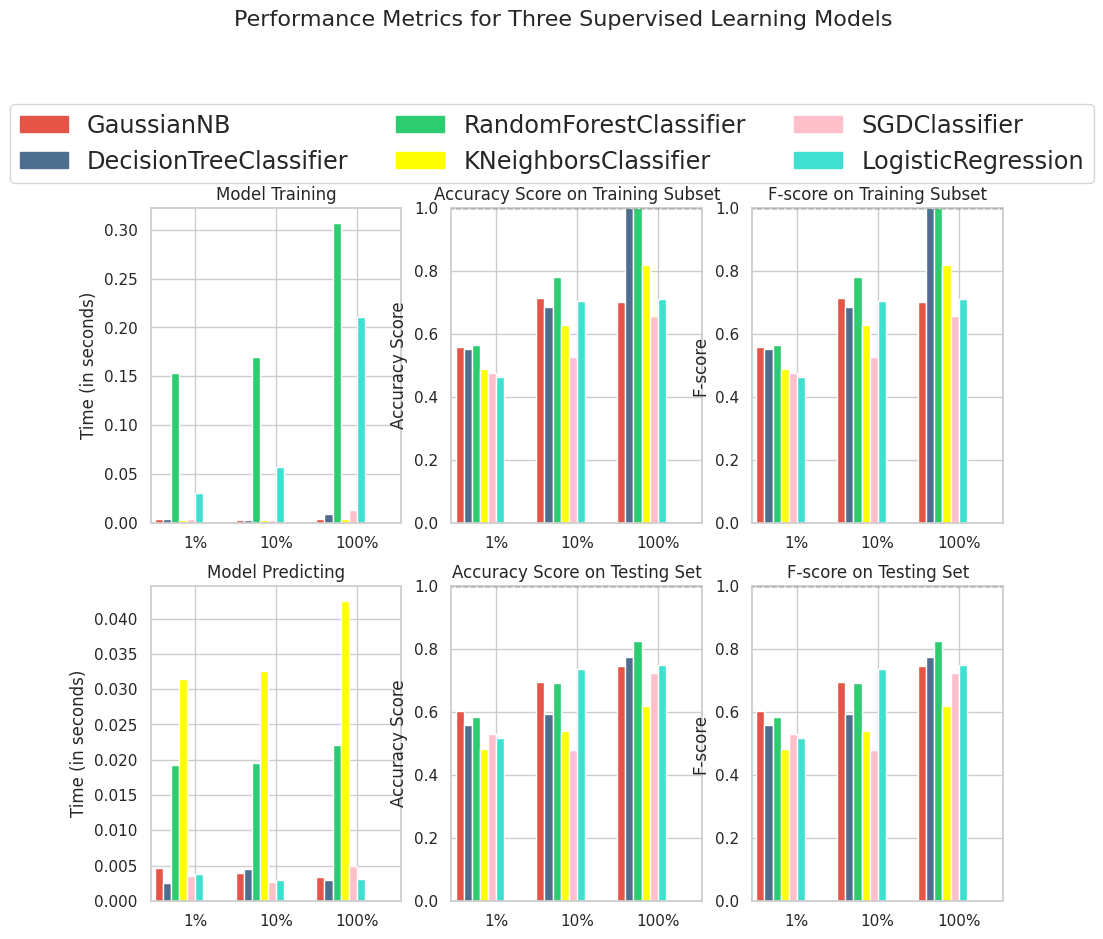

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

clf_A = GaussianNB()
clf_B = DecisionTreeClassifier()
clf_C = RandomForestClassifier()
clf_D = KNeighborsClassifier(n_neighbors = 3)
clf_E = SGDClassifier(max_iter = 1000, tol=1e-3)
clf_F= LogisticRegression(max_iter = 1000, solver='lbfgs', multi_class='multinomial')

samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
  clf_name = clf.__class__.__name__
  results[clf_name] = {}
  for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name][i] = \
    train_predict_evaluate(clf, samples, x_train, y_train, x_test, y_test)

visualize_classification_performance(results)